# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
cities

['new norfolk',
 'yaan',
 'tilichiki',
 'chake chake',
 'grand river south east',
 'albany',
 'labuhan',
 'kozhva',
 'promyshlennaya',
 'yellowknife',
 'adet',
 'kodiak',
 'utiroa',
 'mataura',
 'ushuaia',
 'amot',
 'mgandu',
 'panama city',
 'point fortin',
 'hermanus',
 'lompoc',
 'airai',
 'nazilli',
 'thinadhoo',
 'porto walter',
 'busselton',
 'qaanaaq',
 'praia da vitoria',
 'punta arenas',
 'tamworth',
 'rikitea',
 'escarcega',
 'constitucion',
 'san quintin',
 'los llanos de aridane',
 'atuona',
 'luderitz',
 'millet',
 'ribeira grande',
 'cape town',
 'guerrero negro',
 'san cristobal',
 'kabalo',
 'norman wells',
 'klaksvik',
 'bluff',
 'tias',
 'nishihara',
 'ormara',
 'hilo',
 'urtaaul',
 'attawapiskat',
 'kavieng',
 'karakendzha',
 'pangnirtung',
 'vaini',
 'krutikha',
 'pajapan',
 'verkh-tula',
 'puerto del rosario',
 'grand island',
 'riyadh',
 'piacabucu',
 'barabinsk',
 'soe',
 'faanui',
 'clyde river',
 'lebu',
 'komsomolskiy',
 'hobart',
 'tunduru',
 'pevek',
 'tiksi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Add URL and include type of format of information I wanted returned.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6dacb0f78eae1680d28aa6631ffa1742&units=imperial&q='

In [5]:
# Create lists to hold data returned from OpenWeatherAPI for fields I am interested in/
# Created c_name to create the list is cities with successful calls.  
# That way I could create a df off successful calls, not include those w/o info.
c_name = []
lat = []
long = []
temp = []
humid = []
cloud = []
wind = []
country = []
city_counter= 0

# Loop through the each city in cities and request data fields.  Add them to each list above.  
# Add 1 to the counter to know how many records were successfully returned.
# Error handling to continue moving through cities list if city wasn't found in OpenWeatherAPI.
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        c_name.append(response['name'])
        city_counter = city_counter + 1
        print(f"Record number: {city_counter}. Adding {city} to list.")
    except:
        print(f"No information available for: {city}")
        pass 

Record number: 1. Adding new norfolk to list.
Record number: 2. Adding yaan to list.
Record number: 3. Adding tilichiki to list.
Record number: 4. Adding chake chake to list.
No information available for: grand river south east
Record number: 5. Adding albany to list.
Record number: 6. Adding labuhan to list.
Record number: 7. Adding kozhva to list.
Record number: 8. Adding promyshlennaya to list.
Record number: 9. Adding yellowknife to list.
Record number: 10. Adding adet to list.
Record number: 11. Adding kodiak to list.
No information available for: utiroa
Record number: 12. Adding mataura to list.
Record number: 13. Adding ushuaia to list.
Record number: 14. Adding amot to list.
Record number: 15. Adding mgandu to list.
Record number: 16. Adding panama city to list.
Record number: 17. Adding point fortin to list.
Record number: 18. Adding hermanus to list.
Record number: 19. Adding lompoc to list.
Record number: 20. Adding airai to list.
Record number: 21. Adding nazilli to list.
R

Record number: 171. Adding sistranda to list.
No information available for: viligili
Record number: 172. Adding kaitangata to list.
Record number: 173. Adding tenango de arista to list.
No information available for: belushya guba
Record number: 174. Adding nabire to list.
Record number: 175. Adding aksarayskiy to list.
Record number: 176. Adding santa cruz de la palma to list.
Record number: 177. Adding tuatapere to list.
Record number: 178. Adding kasongo-lunda to list.
Record number: 179. Adding kango to list.
Record number: 180. Adding torbay to list.
Record number: 181. Adding dingle to list.
Record number: 182. Adding lunel to list.
Record number: 183. Adding tigil to list.
Record number: 184. Adding lamego to list.
Record number: 185. Adding villa carlos paz to list.
Record number: 186. Adding vila franca do campo to list.
Record number: 187. Adding bairnsdale to list.
Record number: 188. Adding fort nelson to list.
Record number: 189. Adding longyearbyen to list.
Record number: 

Record number: 336. Adding tautira to list.
Record number: 337. Adding baghmara to list.
Record number: 338. Adding limoncito to list.
Record number: 339. Adding camacupa to list.
Record number: 340. Adding guinabsan to list.
Record number: 341. Adding meulaboh to list.
Record number: 342. Adding sangar to list.
Record number: 343. Adding okhotsk to list.
Record number: 344. Adding sompeta to list.
Record number: 345. Adding kastrakion to list.
Record number: 346. Adding te anau to list.
Record number: 347. Adding okha to list.
Record number: 348. Adding toora-khem to list.
Record number: 349. Adding badin to list.
Record number: 350. Adding sampit to list.
Record number: 351. Adding chapais to list.
Record number: 352. Adding chuy to list.
Record number: 353. Adding alekseyevsk to list.
Record number: 354. Adding muros to list.
No information available for: nizhneyansk
Record number: 355. Adding alofi to list.
Record number: 356. Adding port hedland to list.
No information available f

Record number: 503. Adding pisz to list.
No information available for: victor rosales
Record number: 504. Adding shimoda to list.
No information available for: andenes
Record number: 505. Adding sicuani to list.
Record number: 506. Adding pingxiang to list.
Record number: 507. Adding charlestown to list.
Record number: 508. Adding luanshya to list.
Record number: 509. Adding songjianghe to list.
Record number: 510. Adding nassau to list.
Record number: 511. Adding meadow lake to list.
Record number: 512. Adding santa rosa to list.
Record number: 513. Adding channel-port aux basques to list.
Record number: 514. Adding kaduna to list.
Record number: 515. Adding lahij to list.
No information available for: temaraia
Record number: 516. Adding kutum to list.
Record number: 517. Adding khunti to list.
Record number: 518. Adding kloulklubed to list.
Record number: 519. Adding varhaug to list.
Record number: 520. Adding severo-yeniseyskiy to list.
Record number: 521. Adding zalantun to list.
R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
open_weather_dict = {
    "city": c_name,
    "Latitude": lat,
    "Longitude": long,
    "Humidity": humid,
    "Cloud": cloud,
    "Wind": wind,
    "Country": country,
    "Tempurature": temp
}

open_weather_data = pd.DataFrame(open_weather_dict)
open_weather_data.head()


,city,Latitude,Longitude,Humidity,Cloud,Wind,Country,Tempurature
0,New Norfolk,-42.78,147.06,57,75,12.75,AU,51.40
1,Yaan,7.38,8.57,97,100,7.36,NG,73.13
2,Tilichiki,60.47,166.10,94,100,2.62,RU,55.13
3,Chake Chake,-5.25,39.77,80,25,18.12,TZ,76.55
4,Albany,42.65,-73.75,94,20,2.28,US,70.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

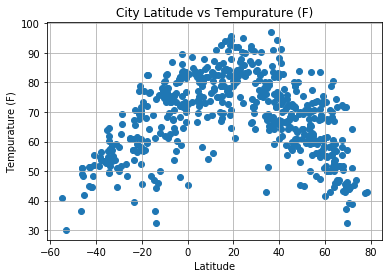

In [7]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Tempurature'], marker="o")

# Add lables for scatterplot
plt.title("City Latitude vs Tempurature (F)")
plt.ylabel("Tempurature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("City_Latitude_v_Temputature.png")

#show the scatterplot
plt.show()

#### Latitude vs. Humidity Plot

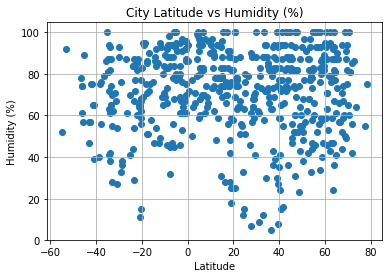

In [8]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Humidity'], marker="o")

# Add lables for scatterplot
plt.title("City Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("City_Latitude_v_Humidity.png")

#show the scatterplot
plt.show()

#### Latitude vs. Cloudiness Plot

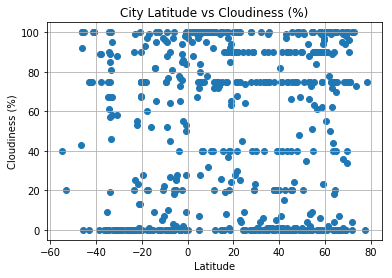

In [9]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Cloud'], marker="o")

# Add lables for scatterplot
plt.title("City Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("City_Latitude_v_Cloudiness.png")

#show the scatterplot
plt.show()

#### Latitude vs. Wind Speed Plot

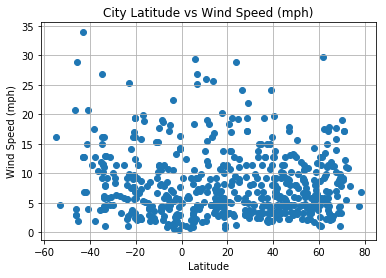

In [10]:
#Create scatterplot of latitude vs. tempurature
plt.scatter(open_weather_data['Latitude'], open_weather_data['Wind'], marker="o")

# Add lables for scatterplot
plt.title("City Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save image of scatterplot
plt.savefig("City_Latitude_v_Wind_Speed.png")

#show the scatterplot
plt.show()